![hackio](https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_celeste@4x.png?raw=true)


# Laboratorio A/B Testing No Paramétricos

**Aerolínea:** 
Alas del Mundo

**Descripción de la Aerolínea**

Alas del Mundo es una aerolínea internacional que opera una amplia red de rutas a nivel mundial. La compañía se enorgullece de ofrecer vuelos cómodos y asequibles a una variedad de destinos, atrayendo a una diversa gama de clientes.

**Objetivo del Análisis**

El objetivo de este ejercicio es determinar si existe una diferencia significativa en el número de vuelos reservados entre pasajeros con diferentes niveles educativos y si existe una diferencia significativa entre el género de sus clientes y su salario. La aerolínea desea entender mejor a sus clientes para poder personalizar sus campañas de marketing y mejorar sus estrategias de ventas.

**Set de datos**

El conjunto de datos *alas_del_mundo.csv* contiene información sobre clientes de la aerolínea Alas del Mundo. A continuación, tenemos una descripción de lo que nos podemos encontrar en el conjunto de datos:

- **Loyalty Number**: Número de registro de cada uno de los clientes.

- **Province**: Provincia de residencia del cliente.

- **City**: Ciudad de residencia del cliente.

- **Gender**: Género con el que se identifica el cliente.

- **Education**: Nivel educativo del cliente.

- **Salary**: Salario anual del cliente.

- **Loyalty Card**: Nivel que tiene el cliente dentro del programa de fidelización de la aerolínea.

- **CLV**: Valor total del cliente para la aerolínea a lo largo de toda su relación.

- **Enrollment Type**: Forma de registro del cliente a la aerolínea.

- **Enrollment Year**: Año de inscripción.

- **Enrollment Month**: Mes de inscripción. 

- **Year**: Año en el que se realizan los vuelos.

- **Month**: Mes en el que se realizan los vuelos.

- **Flights Booked**: Vuelos reservados por el cliente en un mes y año concretos.

- **Distance**: Distancia de vuelo del cliente en un mes y año concreto

- **Points Accumulated**: Puntos acumulados por el cliente en un mes y año concretos.

## Ejercicio 1:

Antes de realizar el experimento A/B y formular hipótesis, es fundamental comprender a fondo el conjunto de datos y sus características. Para lograr esto, debes llevar a cabo un análisis exploratorio detallado de los datos (EDA), con el fin de familiarizarte con ellos y entender la información disponible.



## EDA
La aerolinea cuenta con 16737 clientes en esta base de datos.

*CLV:*  
El valor del cliente para la aerolina tiene una media de 7990,86 lo que dista bastante de la mediana (5776,34) lo que muestra una distorsión de la media

*Enrollment Year y Month:* 
La media es el año 2015 y mes 6 lo que coincide con las medianas respectivas lo que tiene sentido.

*Flights Booked:*  
La media del número de vuelos cogidos por una persona es 4,13 lo que demuestra una elevada distorsión ya que la mediana es 1 vuelo. Además hemos visto como más del 25% de los clientes no han hecho ningun vuelo. Esto nos indica que la mayoría de clientes no reservan vuelos mientras que unos pocos si que son viajeros bastante habituales.

*Distancia y puntos acumulados:*  
Muestran de nuevo una gran distorsión entre la media y la mediana de la misma manera que habíamos identificado un sesgo en las reservas de vuelos.De hecho, tiene sentido que vayan de la mano.

*Salario:*  
Tras haber pasado a absolutos los negativos, ya podemos interpretar los valores.
la media de salario anual de los viajeros 79371,73 lo que no coincide por 6000 aproximadamente con la mediana lo que muestra un sesgo hacia los salarios más altos. Además la desviación estándar nos muestra una variabilidad extremadamente alta pues es de 34726 $ lo que nos muestra que hay clientes con salarios anuales extremadamente bajos como por ejemplo el mínimo de 9081 $ mientras que también hay clientes con salarios extramadamente altos como por ejemplo el máximo de 407228 $ (Grandes diferencias salariales)

 
**Nulos:**  
  
- He identificado más de 102260 nulos en el Salario y el total coincide con el total de clientes que van a College. Es por esto, que no podemos imputar ningún valor, eliminarlos ni inventarnos un dato por ello no queda otra que quedarnos con ellos.


**Duplicados:**    
- He observado que hay duplicados pero tras observarlos y analizarlos, decidí eliminarlos.


***Datos de Interés***  
  
- Hemos observado también que hay 480 salarios negativos que corresponden a gente en High School or below y Bachelor. Dado que nadie paga por trabajar, lo más probable es que se trate de un error tipográfico y por ello decidí pasarlo a absoluto. 
  




In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

import matplotlib.pyplot as plt
from itertools import combinations
from src import funciones as f

In [3]:
aerolinea=pd.read_csv("datos/alas_del_mundo.csv")

In [4]:
aerolinea.head(3)

,Loyalty Number,Province,City,Gender,Education,Salary,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Distance,Points Accumulated
0,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,1,0,0,0.0
1,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,2,3,2823,282.0
2,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,3,0,0,0.0


In [5]:
aerolinea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Loyalty Number      405624 non-null  int64  
 1   Province            405624 non-null  object 
 2   City                405624 non-null  object 
 3   Gender              405624 non-null  object 
 4   Education           405624 non-null  object 
 5   Salary              302952 non-null  float64
 6   Loyalty Card        405624 non-null  object 
 7   CLV                 405624 non-null  float64
 8   Enrollment Type     405624 non-null  object 
 9   Enrollment Year     405624 non-null  int64  
 10  Enrollment Month    405624 non-null  int64  
 11  Year                405624 non-null  int64  
 12  Month               405624 non-null  int64  
 13  Flights Booked      405624 non-null  int64  
 14  Distance            405624 non-null  int64  
 15  Points Accumulated  405624 non-nul

In [6]:
aerolinea[aerolinea["Salary"].isnull()].shape

(102672, 16)

In [7]:
aerolinea[aerolinea["Education"]== "College"].shape

(102672, 16)

In [8]:
aerolinea[aerolinea["Salary"] < 0].head(3)

,Loyalty Number,Province,City,Gender,Education,Salary,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Distance,Points Accumulated
26328,542976,Quebec,Montreal,Male,High School or Below,-49830.0,Star,24127.5,2018 Promotion,2018,3,2017,1,0,0,0.0
26329,542976,Quebec,Montreal,Male,High School or Below,-49830.0,Star,24127.5,2018 Promotion,2018,3,2017,2,0,0,0.0
26330,542976,Quebec,Montreal,Male,High School or Below,-49830.0,Star,24127.5,2018 Promotion,2018,3,2017,3,0,0,0.0


Aqui paso a absolutos los negativos

In [9]:
aerolinea["Salary"]= aerolinea["Salary"].apply(lambda x: abs(x) if x < 0 else x)

In [10]:
aerolinea.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
Salary,302952.0,79381.440228,34735.904533,9081.00,59262.00,73479.00,88612.00,407228.00
CLV,405624.0,7991.976226,6863.663857,1898.01,3985.32,5776.34,8936.82,83325.38
Enrollment Year,405624.0,2015.252529,1.979427,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,405624.0,6.668008,3.399766,1.00,4.00,7.00,10.00,12.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
Distance,405624.0,1208.880059,1433.155320,0.00,0.00,488.00,2336.00,6293.00
Points Accumulated,405624.0,123.692721,146.599831,0.00,0.00,50.00,239.00,676.50


In [11]:
aerolinea.describe(include=("O")).T

,count,unique,top,freq
Province,405624,11,Ontario,130896
City,405624,29,Toronto,81096
Gender,405624,2,Female,203640
Education,405624,5,Bachelor,253752
Loyalty Card,405624,3,Star,184224
Enrollment Type,405624,2,Standard,382200


In [12]:
aerolinea.duplicated().sum()

np.int64(1864)

In [13]:
aerolinea.drop_duplicates(inplace=True)

In [14]:
aerolinea.groupby(["Loyalty Card", "Gender"])["Salary"].median()

Loyalty Card  Gender
Aurora        Female    74612.0
              Male      73943.0
Nova          Female    73945.0
              Male      72656.0
Star          Female    72900.0
              Male      73336.0
Name: Salary, dtype: float64

## Ejercicio 2:
Determina si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

 Pasos a seguir:

   - Definición de la hipótesis.
   - Prueba de hipótesis
   - Análisis de resultados
   - Conclusiones
   


In [15]:
f.usar_kolmogorov(aerolinea,"Education" , "Flights Booked")

la metrica para Bachelor sigue una distribución normal según el test de Kolmogorov-Smirnov. Esta afirmación es False
la metrica para College sigue una distribución normal según el test de Kolmogorov-Smirnov. Esta afirmación es False
la metrica para Master sigue una distribución normal según el test de Kolmogorov-Smirnov. Esta afirmación es False
la metrica para High School or Below sigue una distribución normal según el test de Kolmogorov-Smirnov. Esta afirmación es False
la metrica para Doctor sigue una distribución normal según el test de Kolmogorov-Smirnov. Esta afirmación es False


In [16]:
lista_datos=f.crear_df_grupo(aerolinea,"Education","Flights Booked")
f.elegir_test(lista_datos,dependencia=False)

El test óptimo es Kruskall-Wallis


KruskalResult(statistic=np.float64(17.532618623121756), pvalue=np.float64(0.0015225470219889365))

Como el p-value < 0,05 no hay evidencia suficiente para aceptar la Ho lo que significa que hay diferencias en el número de reservas de vuelo en función del nivel educativo (al menos uno es diferente).

C:\Users\jaime\AppData\Local\Temp\ipykernel_9072\459867659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Education", y="Flights Booked", data=aerolinea , palette="mako")


Text(0, 0.5, 'Número de reservas de vuelo')

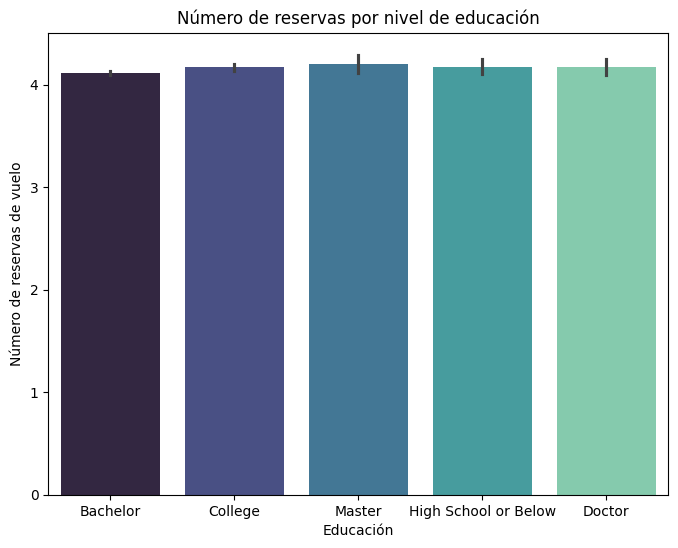

In [17]:
plt.figure(figsize=(8,6))
sns.barplot(x="Education", y="Flights Booked", data=aerolinea , palette="mako")
plt.title("Número de reservas por nivel de educación")
plt.xlabel("Educación")
plt.ylabel("Número de reservas de vuelo")

C:\Users\jaime\AppData\Local\Temp\ipykernel_9072\226430264.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Education", y="Flights Booked", data=aerolinea , palette="mako")


Text(0, 0.5, 'Número de reservas de vuelo')

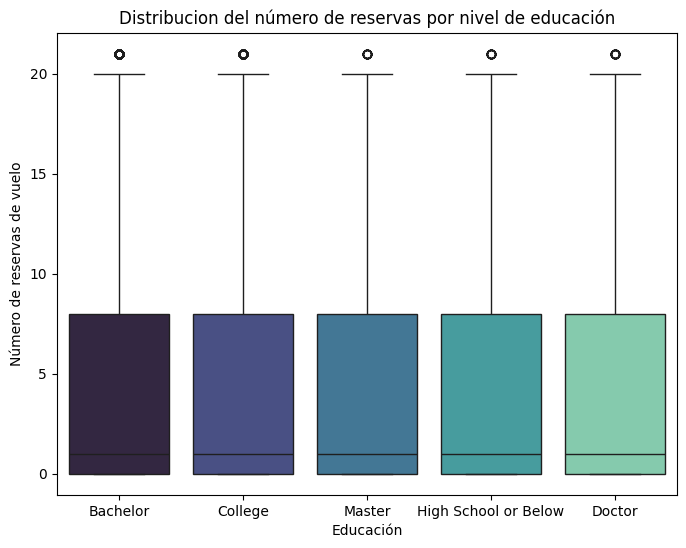

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Education", y="Flights Booked", data=aerolinea , palette="mako")
plt.title("Distribucion del número de reservas por nivel de educación")
plt.xlabel("Educación")
plt.ylabel("Número de reservas de vuelo")

Como no se pueden identificar gráficamente esas diferencias toca evaluar las distintas combinaciones

In [19]:
f.usar_whitney(aerolinea,"Education" , "Flights Booked")

La evaluación de la hipótesis entre Bachelor y College da un p-value de 0.002278100128804696
Hay diferencia
.................
La evaluación de la hipótesis entre Bachelor y Master da un p-value de 0.014056962299193064
Hay diferencia
.................
La evaluación de la hipótesis entre Bachelor y High School or Below da un p-value de 0.036000727159277525
Hay diferencia
.................
La evaluación de la hipótesis entre Bachelor y Doctor da un p-value de 0.09460787010212152
No hay diferencia
.................
La evaluación de la hipótesis entre College y Master da un p-value de 0.23837842894303352
No hay diferencia
.................
La evaluación de la hipótesis entre College y High School or Below da un p-value de 0.575742751816062
No hay diferencia
.................
La evaluación de la hipótesis entre College y Doctor da un p-value de 0.8395531886114369
No hay diferencia
.................
La evaluación de la hipótesis entre Master y High School or Below da un p-value de 0.555679876

**Finalmente, concluimos que los clientes con un nivel educativo de Bachelor tienen un menor número de reservas de vuelos medio con respecto al resto de niveles educativos. Esto podría estar relacionado con los ingresos pero lo confirmaremos en el siguiente apartado.**

## Ejercicio 3:
Determina si existe una diferencia significativa en el salario de los clientes en función del género de los mismos.

Pasos a seguir:
   - Definición de la hipótesis.
   - Prueba de hipótesis
   - Análisis de resultados
   - Conclusiones

Ahora que ya hemos tenido en cuenta College paso a elimiar los nulos para el ejercicio 3

In [20]:
aerolineasin=aerolinea.dropna()

In [21]:
aerolineasin.shape

(301500, 16)

In [22]:
f.usar_kolmogorov(aerolineasin,"Gender" , "Salary")

la metrica para Female sigue una distribución normal según el test de Kolmogorov-Smirnov. Esta afirmación es False
la metrica para Male sigue una distribución normal según el test de Kolmogorov-Smirnov. Esta afirmación es False


In [23]:
lista_datos=f.crear_df_grupo(aerolineasin,"Gender","Salary")
f.elegir_test(lista_datos,dependencia=False)

El test óptimo es Mann-Whitney


MannwhitneyuResult(statistic=np.float64(11463807930.0), pvalue=np.float64(1.8291925056993112e-05))

Como el p-value < 0,05 no hay evidencia suficiente para aceptar la Ho lo que significa que hay diferencias en el salario en función del género.

C:\Users\jaime\AppData\Local\Temp\ipykernel_9072\282756715.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gender", y="Salary", data=aerolineasin , palette="mako")


Text(0, 0.5, 'Salario')

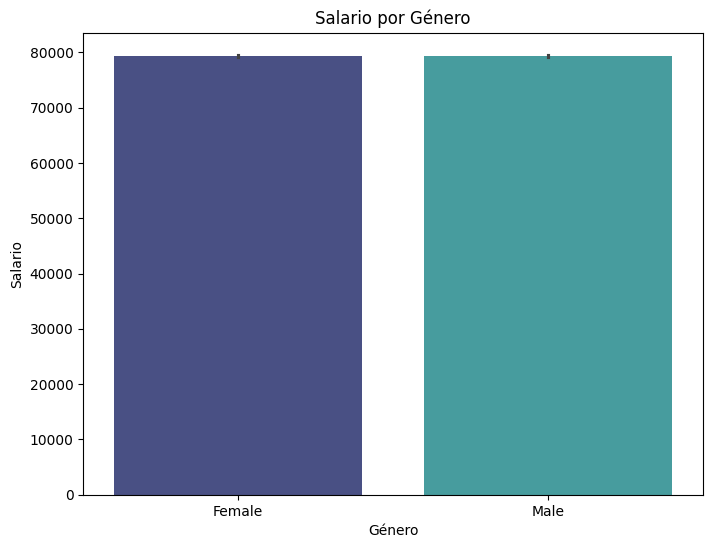

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(x="Gender", y="Salary", data=aerolineasin , palette="mako")
plt.title("Salario por Género")
plt.xlabel("Género")
plt.ylabel("Salario")


C:\Users\jaime\AppData\Local\Temp\ipykernel_9072\4122130862.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="Salary", data=aerolineasin , palette="mako")


Text(0, 0.5, 'Salario')

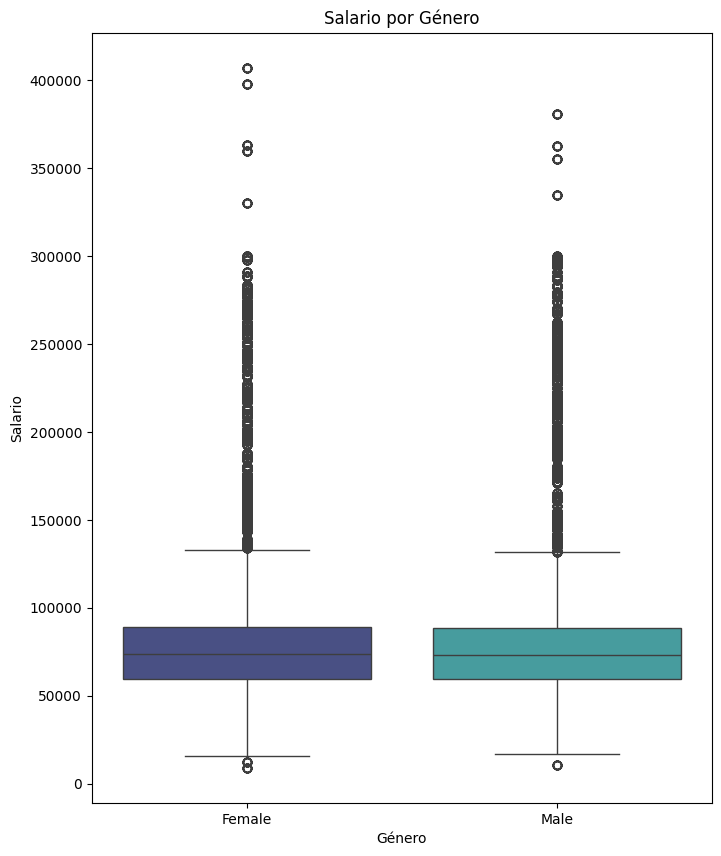

In [25]:
plt.figure(figsize=(8,10))
sns.boxplot(x="Gender", y="Salary", data=aerolineasin , palette="mako")
plt.title("Salario por Género")
plt.xlabel("Género")
plt.ylabel("Salario")

In [26]:
f.usar_whitney(aerolineasin,"Gender" , "Salary")

La evaluación de la hipótesis entre Female y Male da un p-value de 1.8291925056993112e-05
Hay diferencia
.................


A pesar de que en la gráfica parece no haber diferencia, tras contrastar la hipótesis mediante el método de Whitney nos sale que si que hay una diferencia significativa. Esto se traduce en que hay una diferencia entre Hombres y Mujeres en su salario, concretamente, los hombres cobran más que las mujeres.

De normal se debería haber usado Willcoxon pero dado que al eliminar nulos se han desequilibrado las muestras, ya no se puede. 
VOY A INTENTAR NO ELIMINAR LOS NULOS EN ESTE CASO Y APLICAR WILLCOXON


In [ ]:
aerolineasin["Gender"].value_counts()

Gender
Female    152395
Male      149105
Name: count, dtype: int64

In [28]:
aerolinea["Gender"].value_counts()

Gender
Female    202757
Male      201003
Name: count, dtype: int64

In [40]:
listacardunique= aerolinea["Loyalty Card"].unique()
listacard= aerolinea.groupby("Loyalty Card")["Salary"].median()
diccm={}
for ind,val in zip(listacardunique,listacard):
    diccm[ind]=val

In [41]:
diccm

{'Star': 74124.0, 'Aurora': 73360.0, 'Nova': 73135.0}

In [42]:
aerolinea["Salary"] = aerolinea["Salary"].fillna(aerolinea["Loyalty Card"].map(diccm))

In [43]:
aerolinea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Loyalty Number      403760 non-null  int64  
 1   Province            403760 non-null  object 
 2   City                403760 non-null  object 
 3   Gender              403760 non-null  object 
 4   Education           403760 non-null  object 
 5   Salary              403760 non-null  float64
 6   Loyalty Card        403760 non-null  object 
 7   CLV                 403760 non-null  float64
 8   Enrollment Type     403760 non-null  object 
 9   Enrollment Year     403760 non-null  int64  
 10  Enrollment Month    403760 non-null  int64  
 11  Year                403760 non-null  int64  
 12  Month               403760 non-null  int64  
 13  Flights Booked      403760 non-null  int64  
 14  Distance            403760 non-null  int64  
 15  Points Accumulated  403760 non-null  fl

Como aun rellenando los nulos quedan diferencias en el tamaño de las muestras, re muestreamos aleatoriamente de nuestras muestras para conseguir dos de igual tamaño muestral y ya sacamos el test de Wilcoxon

In [49]:
salarios_male = aerolinea[aerolinea["Gender"] == "Male"]["Salary"]
salarios_female = aerolinea[aerolinea["Gender"] == "Female"]["Salary"]

min_length = min(len(salarios_male), len(salarios_female))
salarios_male = salarios_male.sample(n=min_length, random_state=1)
salarios_female = salarios_female.sample(n=min_length, random_state=1)

estadistico,p_value = stats.wilcoxon(salarios_male, salarios_female)
if p_value >= 0.05:
    print("No hay diferencia")
    print(".................")
else:
    print("Hay diferencia")
    print(".................")


Hay diferencia
.................


Aquí comprobamos mediante el test Wilcoxon que efectivamente si que se encuentran diferencias en los salarios de los distintos grupos (Hombres y Mujeres).